In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from os import path

In [3]:
def plot_and_save(df, name, kind='line', xlabel=None, ylabel=None, xticks=None, **kwargs):
    ax = df.plot(kind=kind, **kwargs)
    
    if xlabel != None:
        ax.set_xlabel(xlabel)
    if ylabel != None:
        ax.set_ylabel(ylabel)
    if xticks != None:
        ax.set_xticklabels(xticks, rotation='horizontal')
    plt.tight_layout(0.4)
    
    ax.legend().set_visible(False)
    mpl.pyplot.savefig("../../paper/plots/" + name + "_no_legend.pdf", dpi=300)
    ax.legend().set_visible(True)
    mpl.pyplot.savefig("../../paper/plots/" + name + ".pdf", dpi=300)
    
    return ax

In [4]:
def read(name):
    df = pd.read_csv("../../paper/plots/{}.csv".format(name), header=0, index_col=0)
    if path.isfile("../../paper/plots/{}_std_err.csv".format(name)):
        return (df, pd.read_csv("../../paper/plots/{}_std_err.csv".format(name), header=0, index_col=0))
    return (df, None)

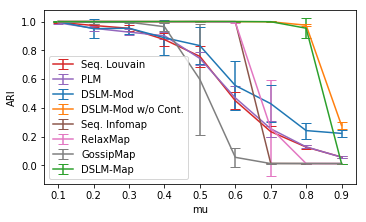

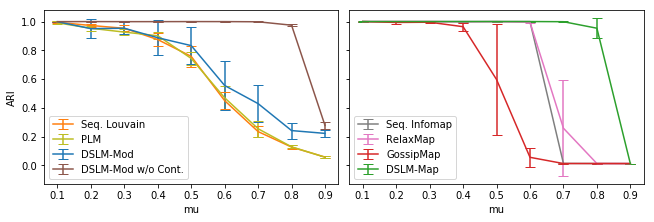

In [12]:
(df, err) = read("quality_ARI")
plot_and_save(df, 'quality_ARI_all', yerr=err, ylabel="ARI", capsize=5, figsize=(5, 3), color=['C3', 'C4', 'C0', 'C1', 'C5', 'C6', 'C7', 'C2'])
mod_algos = ['Seq. Louvain', 'PLM', 'DSLM-Mod', 'DSLM-Mod w/o Cont.']
map_algos = ['Seq. Infomap', 'RelaxMap', 'GossipMap', 'DSLM-Map']
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(9, 3))
plot_and_save(df[mod_algos], 'quality_ARI', ax=ax[0], yerr=err[mod_algos], ylabel="ARI", capsize=5, color=['C1', 'C8', 'C0', 'C5'])
plot_and_save(df[map_algos], 'quality_ARI', ax=ax[1], yerr=err[map_algos], ylabel="ARI", capsize=5, color=['C7', 'C6', 'C3', 'C2'])

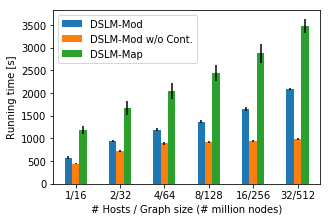

In [17]:
(df, err) = read("weak_scaling_runtime")
plot_and_save(df, "weak_scaling_runtime", yerr=err, kind='bar', figsize=(4.5, 3), ylabel="Running time [s]", xlabel="# Hosts / Graph size (# million nodes)", xticks=['1/16', '2/32', '4/64', '8/128', '16/256', '32/512'])

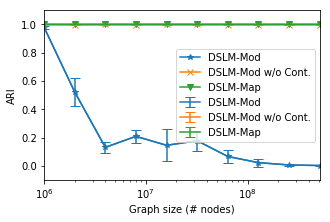

In [18]:
(df, err) = read("weak_scaling_ARI")
plt.figure()
ax = df.plot(figsize=(4.5, 3), logx=True, style=['-*', '-x', '-v'], ylim=(-0.1, 1.1))
df.plot(ax=ax, yerr=err, capsize=5, color=['C0', 'C1', 'C2'])
ax.set_xlabel("Graph size (# nodes)")
ax.set_ylabel("ARI")

plt.tight_layout(0.4)
    
ax.legend().set_visible(False)
mpl.pyplot.savefig("../../paper/plots/" + 'weak_scaling_ARI' + "_no_legend.pdf", dpi=300)
ax.legend().set_visible(True)
mpl.pyplot.savefig("../../paper/plots/" + 'weak_scaling_ARI' + ".pdf", dpi=300)

#ax = plot_and_save(df, 'weak_scaling_ARI', figsize=(4.5, 3), ylabel="ARI", xlabel="Graph size (# Nodes)", logx=True, style=['-*', '-x', '-v'], ylim=(-0.1, 1.1))
#plot_and_save(df, 'weak_scaling_ARI', ax=ax, yerr=err, figsize=(4.5, 3), ylabel="ARI", xlabel="Graph size (# Nodes)", logx=True, ylim=(-0.1, 1.1), capsize=5)